# Forecasting Electricity Load of Houston
(40 points)
### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. carry out component decomposition for the electricity load of Houston

2. build an ARIMA model with an optimal order (p, d, q)

3. make a prediction for next 30 days, plot it out, and explain your results.

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [ ]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [ ]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

00:00   01:00   02:00   03:00  ...    20:00    21:00    22:00   23:00
date                                        ...                                   
2017-01-01  8791.8  8569.7  8326.4  8137.5  ...  10230.6  10014.8   9667.7  9287.7
2017-01-02  8836.8  8588.2  8480.8  8506.0  ...  10594.2  10196.7   9568.1  8935.5
2017-01-03  8516.6  8238.2  8102.8  8094.3  ...  10577.2  10100.1   9488.8  8916.9
2017-01-04  8462.0  8316.5  8259.6  8336.3  ...  11416.8  11010.9  10392.6  9784.5
2017-01-05  9472.0  9198.3  9051.1  9031.1  ...  11194.9  10882.2  10416.8  9959.7

[5 rows x 24 columns]

In [ ]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

load
date                
2017-01-01  220989.4
2017-01-02  235680.6
2017-01-03  237534.1
2017-01-04  247560.4
2017-01-05  251129.3

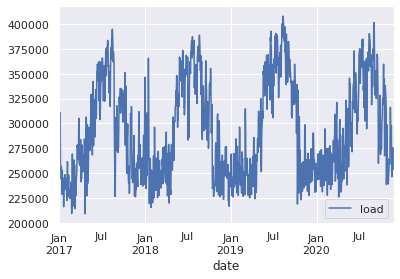

In [ ]:
df.plot()

## Component Decomposition

In [ ]:
df.values

array([[220989.4],
       [235680.6],
       [237534.1],
       ...,
       [261406.1],
       [260497. ],
       [253869.3]])

In [ ]:
import numpy as np
np.argmax(df.values)

953

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


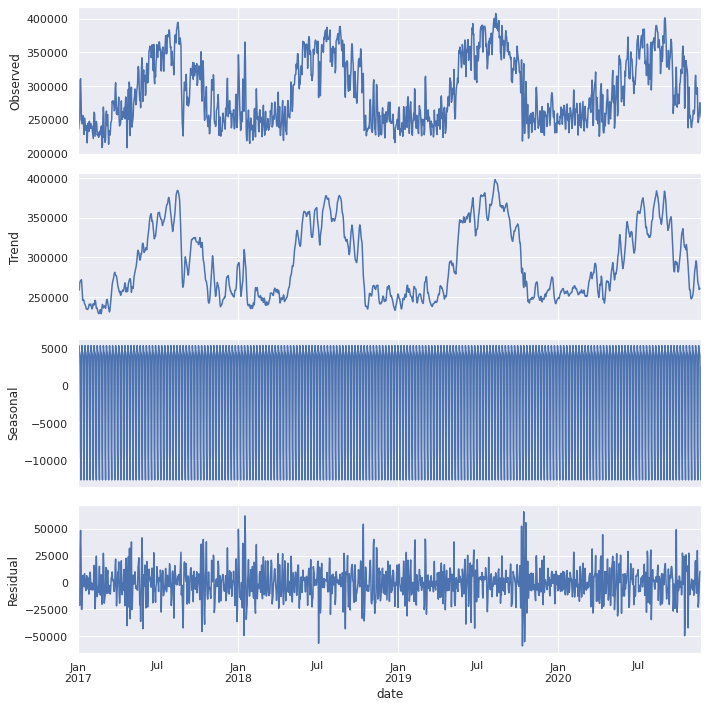

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
result.plot();

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
X = df.resample('d').mean().diff(periods=1).values[1:]

## ARIMA Model and Forecasting

In [ ]:
def arima_order(data, order=10, verbose=True):
  import warnings
  import itertools
  p=d=q=range(0,order)
  pdq = list(itertools.product(p,d,q))
  warnings.filterwarnings("ignore")
  aic_pair={}
  min_aic=9999999
  min_order=(0,0,0)
  for o in pdq:
    try:
      model_arima = ARIMA(data, order=o)
      model_arima_fit=model_arima.fit()
      fit_aic = model_arima_fit.aic
      if verbose: print(o, fit_aic)
      if not np.isnan(fit_aic):
        if min_aic>fit_aic:
          min_aic = fit_aic
          min_order=o
      aic_pair.update({o, rmodel_arima_fit.aic})
    except:
      continue
  return min_order

In [ ]:
arima_order(X, order=4)

(0, 0, 0) 32042.080527666843
(0, 0, 1) 32035.566441772127
(0, 0, 2) 31825.2223369933
(0, 0, 3) 31794.55046910013
(0, 1, 0) 32939.407436537804
(0, 1, 1) 32029.737342278113
(0, 1, 2) 32023.001470728177
(0, 2, 0) 34270.82284327978
(0, 2, 1) 32926.489195748174
(1, 0, 0) 32041.173127633294
(1, 0, 1) 31919.607698740117
(1, 0, 2) 31793.577145552743
(1, 0, 3) 31795.20729345799
(1, 1, 0) 32810.115689827624
(1, 2, 0) 33880.18284165286
(2, 0, 0) 31863.540249375466
(2, 0, 1) 31816.82604837233
(2, 0, 2) 31795.398273752442
(2, 0, 3) 31797.15151337777
(2, 1, 0) 32496.62536592675
(2, 1, 1) 31851.773005435865
(2, 2, 0) 33443.52579130878
(3, 0, 0) 31852.341170699357
(3, 0, 1) 31792.642521091748
(3, 0, 2) 31793.821930188216
(3, 0, 3) 31789.19275980751
(3, 1, 0) 32360.23441956153
(3, 1, 1) 31840.74758885175
(3, 2, 0) 33141.59463537471


(3, 0, 3)

In [ ]:
model_arima = ARIMA(X, order=(3, 0, 3))
model_arima_fit=model_arima.fit()

In [ ]:
X.shape

(1422, 1)

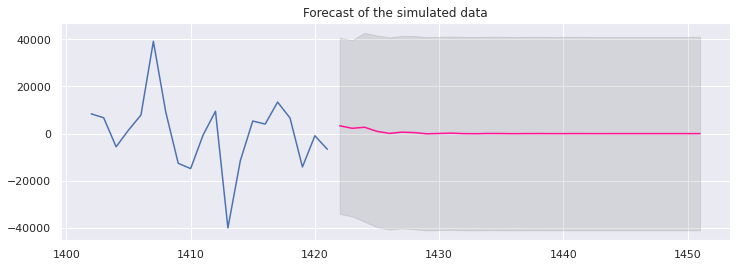

In [ ]:
n_pred = 30
pred_array, se_array, CI_array = model_arima_fit.forecast(steps=n_pred,alpha=0.03) # alpha: confidence level
plt.figure(figsize=(12,4))
pred_array_index = range(X.shape[0], X.shape[0]+n_pred)
plt.plot(range(X.shape[0]-20, X.shape[0]), X[-20:])
plt.plot(pred_array_index, pred_array, color = "deeppink")
plt.fill_between(pred_array_index, CI_array[:,0], CI_array[:,1], color = "k", alpha = .1 )
plt.title('Forecast of the simulated data')
plt.show()

In [ ]:
def inverse_difference(h, x, interval=1):
	return x + h[-interval]

In [ ]:
history = [x for x in X]
day =1
forecast = model_arima_fit.forecast(steps=30)[0]
for y in forecast:
	inverted = inverse_difference(history, y)
	print('Day %d: %6.2f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: -3313.52
Day 2: -1064.76
Day 3: 1626.27
Day 4: 2583.02
Day 5: 2668.01
Day 6: 3283.56
Day 7: 3712.64
Day 8: 3635.15
Day 9: 3689.65
Day 10: 3874.96
Day 11: 3874.32
Day 12: 3835.87
Day 13: 3894.23
Day 14: 3922.87
Day 15: 3900.83
Day 16: 3910.35
Day 17: 3933.11
Day 18: 3931.32
Day 19: 3930.60
Day 20: 3942.60
Day 21: 3948.68
Day 22: 3949.71
Day 23: 3955.88
Day 24: 3962.81
Day 25: 3966.51
Day 26: 3971.01
Day 27: 3976.99
Day 28: 3981.93
Day 29: 3986.44
Day 30: 3991.70


In [ ]:
# we can see in the resulsts that the simulated data will be pretty stagnant,
# it seems that it will roughly stay around the same and that is typical during part of the year
# we see major changes in the load during the fall and spring to prepare for summer and winter 
#this is in a period of time that has no unexpected changes coming, 
#most likely end of spring and starting of summer with the energy load ramping up and then becoming flat 
#on the days that are negatvie this means that people are giving more than using into the system 
